# Assignment-09

# Association Rules 

# Question 1

Books data

In [5]:
import pandas as pd
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder

In [6]:
books=pd.read_csv('book.csv')
books

ChildBks  YouthBks  CookBks  DoItYBks  RefBks  ArtBks  GeogBks  \
0            0         1        0         1       0       0        1   
1            1         0        0         0       0       0        0   
2            0         0        0         0       0       0        0   
3            1         1        1         0       1       0        1   
4            0         0        1         0       0       0        1   
...        ...       ...      ...       ...     ...     ...      ...   
1995         0         0        1         0       0       1        1   
1996         0         0        0         0       0       0        0   
1997         0         0        0         0       0       0        0   
1998         0         0        1         0       0       0        0   
1999         0         0        0         0       0       0        0   

      ItalCook  ItalAtlas  ItalArt  Florence  
0            0          0        0         0  
1            0          0        0         0  
2            0          0        0         0  
3            0          0        0         0  
4            0          0        0         0  
...        ...        ...      ...       ...  
1995         1          0        1         1  
1996         0          0        0         0  
1997         0          0        0         0  
1998         0          0        0         0  
1999         0          0        0         0  

[2000 rows x 11 columns]

As the data is already in transaction format no need to use transaction encoder.

# Apriori Algorithm

# 10% support and 70% confidence

In [9]:
frequent_itemsets = apriori(books, min_support=0.10, use_colnames=True)
frequent_itemsets

C:\Users\karth\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


support                       itemsets
0    0.4230                     (ChildBks)
1    0.2475                     (YouthBks)
2    0.4310                      (CookBks)
3    0.2820                     (DoItYBks)
4    0.2145                       (RefBks)
5    0.2410                       (ArtBks)
6    0.2760                      (GeogBks)
7    0.1135                     (ItalCook)
8    0.1085                     (Florence)
9    0.1650           (ChildBks, YouthBks)
10   0.2560            (ChildBks, CookBks)
11   0.1840           (ChildBks, DoItYBks)
12   0.1515             (ChildBks, RefBks)
13   0.1625             (ChildBks, ArtBks)
14   0.1950            (ChildBks, GeogBks)
15   0.1620            (YouthBks, CookBks)
16   0.1155           (YouthBks, DoItYBks)
17   0.1010             (ArtBks, YouthBks)
18   0.1205            (YouthBks, GeogBks)
19   0.1875            (DoItYBks, CookBks)
20   0.1525              (RefBks, CookBks)
21   0.1670              (ArtBks, CookBks)
22   0.1925             (CookBks, GeogBks)
23   0.1135            (CookBks, ItalCook)
24   0.1055             (RefBks, DoItYBks)
25   0.1235             (ArtBks, DoItYBks)
26   0.1325            (DoItYBks, GeogBks)
27   0.1105              (RefBks, GeogBks)
28   0.1275              (ArtBks, GeogBks)
29   0.1290  (ChildBks, YouthBks, CookBks)
30   0.1460  (ChildBks, DoItYBks, CookBks)
31   0.1225    (ChildBks, RefBks, CookBks)
32   0.1265    (ChildBks, ArtBks, CookBks)
33   0.1495   (ChildBks, CookBks, GeogBks)
34   0.1045  (ChildBks, DoItYBks, GeogBks)
35   0.1020    (ChildBks, ArtBks, GeogBks)
36   0.1015    (ArtBks, DoItYBks, CookBks)
37   0.1085   (DoItYBks, CookBks, GeogBks)
38   0.1035     (ArtBks, CookBks, GeogBks)

In [10]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=0.7)
rules
rules.sort_values('lift',ascending = False)

antecedents          consequents  antecedent support  \
28           (CookBks)           (ItalCook)              0.4310   
29          (ItalCook)            (CookBks)              0.1135   
76  (ChildBks, ArtBks)            (GeogBks)              0.1625   
81           (GeogBks)   (ChildBks, ArtBks)              0.2760   
85            (ArtBks)  (CookBks, DoItYBks)              0.2410   
..                 ...                  ...                 ...   
5           (DoItYBks)           (ChildBks)              0.2820   
12          (YouthBks)            (CookBks)              0.2475   
13           (CookBks)           (YouthBks)              0.4310   
3            (CookBks)           (ChildBks)              0.4310   
2           (ChildBks)            (CookBks)              0.4230   

    consequent support  support  confidence      lift  leverage  conviction  
28              0.1135   0.1135    0.263341  2.320186  0.064582    1.203406  
29              0.4310   0.1135    1.000000  2.320186  0.064582         inf  
76              0.2760   0.1020    0.627692  2.274247  0.057150    1.944628  
81              0.1625   0.1020    0.369565  2.274247  0.057150    1.328448  
85              0.1875   0.1015    0.421162  2.246196  0.056313    1.403674  
..                 ...      ...         ...       ...       ...         ...  
5               0.4230   0.1840    0.652482  1.542511  0.064714    1.660347  
12              0.4310   0.1620    0.654545  1.518667  0.055328    1.647105  
13              0.2475   0.1620    0.375870  1.518667  0.055328    1.205678  
3               0.4230   0.2560    0.593968  1.404179  0.073687    1.421069  
2               0.4310   0.2560    0.605201  1.404179  0.073687    1.441240  

[100 rows x 9 columns]

By the above information, when i apply support as 10% and minimum lift threshold as 0.7, The insights are as follows,

In the first association rule, the person who purchased cook books also should have purchased ital cook books.

In the second association rule, the person who purchased ital cook books also should have purchased cook books.

these first and second association rules are same and having same lift ration of 2.320.

when two same rules having same lift ratio then we have to consider confidence percentage betwwen them. the confidence perecentage of second rule is high so we have to consider second rule.

the person who purchased ital cook books also should have purchased cook books.

Like this, in the third rule, the person who purchased artbooks and child books also should have purchased geography books.

in the fourth rule, the person who perchased geography books also should have purchased artbooks and child books.

these third and fourth association rules are same and having same lift ration of 2.27.

so we have to consider confidence percentage betwwen them. the confidence perecentage of third rule is high so we have to consider third rule.

the person who purchased artbooks and child books also should have purchased geography books.



In [11]:
rules[rules.lift>1]

antecedents         consequents  antecedent support  \
0           (ChildBks)          (YouthBks)              0.4230   
1           (YouthBks)          (ChildBks)              0.2475   
2           (ChildBks)           (CookBks)              0.4230   
3            (CookBks)          (ChildBks)              0.4310   
4           (ChildBks)          (DoItYBks)              0.4230   
..                 ...                 ...                 ...   
95   (ArtBks, GeogBks)           (CookBks)              0.1275   
96  (CookBks, GeogBks)            (ArtBks)              0.1925   
97            (ArtBks)  (CookBks, GeogBks)              0.2410   
98           (CookBks)   (ArtBks, GeogBks)              0.4310   
99           (GeogBks)   (ArtBks, CookBks)              0.2760   

    consequent support  support  confidence      lift  leverage  conviction  
0               0.2475   0.1650    0.390071  1.576044  0.060308    1.233750  
1               0.4230   0.1650    0.666667  1.576044  0.060308    1.731000  
2               0.4310   0.2560    0.605201  1.404179  0.073687    1.441240  
3               0.4230   0.2560    0.593968  1.404179  0.073687    1.421069  
4               0.2820   0.1840    0.434988  1.542511  0.064714    1.270770  
..                 ...      ...         ...       ...       ...         ...  
95              0.4310   0.1035    0.811765  1.883445  0.048547    3.022812  
96              0.2410   0.1035    0.537662  2.230964  0.057107    1.641657  
97              0.1925   0.1035    0.429461  2.230964  0.057107    1.415327  
98              0.1275   0.1035    0.240139  1.883445  0.048547    1.148237  
99              0.1670   0.1035    0.375000  2.245509  0.057408    1.332800  

[100 rows x 9 columns]

These are the rules which are having lift ratio above 1

# Visualization

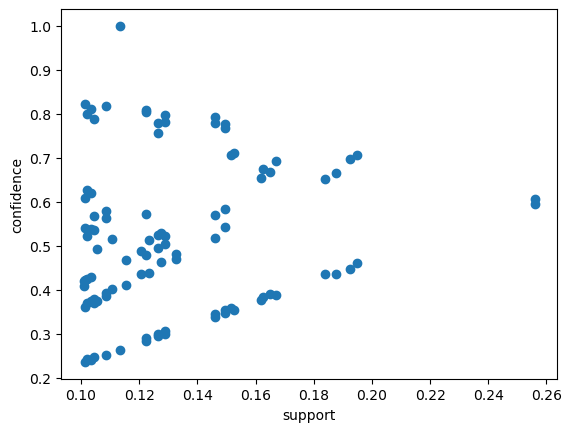

In [12]:
import matplotlib.pyplot as plt
plt.scatter(rules['support'],rules['confidence'])
plt.xlabel('support')
plt.ylabel('confidence') 
plt.show()

# Lets try with 20% support and 65% confidence

In [13]:
frequent_itemsets1 = apriori(books, min_support=0.20, use_colnames=True)
frequent_itemsets1

C:\Users\karth\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


support             itemsets
0   0.4230           (ChildBks)
1   0.2475           (YouthBks)
2   0.4310            (CookBks)
3   0.2820           (DoItYBks)
4   0.2145             (RefBks)
5   0.2410             (ArtBks)
6   0.2760            (GeogBks)
7   0.2560  (ChildBks, CookBks)

In [14]:
rules1 = association_rules(frequent_itemsets1, metric="lift", min_threshold=0.65)
rules1
rules1.sort_values('lift',ascending = False)

antecedents consequents  antecedent support  consequent support  support  \
0  (ChildBks)   (CookBks)               0.423               0.431    0.256   
1   (CookBks)  (ChildBks)               0.431               0.423    0.256   

   confidence      lift  leverage  conviction  
0    0.605201  1.404179  0.073687    1.441240  
1    0.593968  1.404179  0.073687    1.421069

By the above information, when i apply support as 20% and minimum lift threshold as 0.65, The insights are as follows,

In the first rule, the person who purchased child books also should have purchased cook books.

In the second rule , the person who purchased cook books also shoild have purchased child books.

As the first rule confidence is high we can consider this rule.

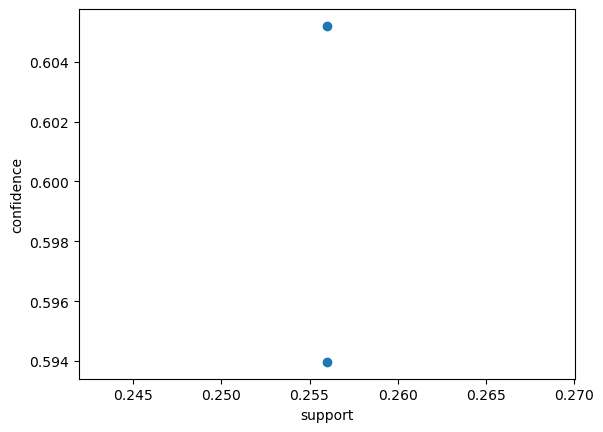

In [15]:
plt.scatter(rules1['support'],rules1['confidence'])
plt.xlabel('support')
plt.ylabel('confidence') 
plt.show()

# Question 2

Movies data

In [16]:
movies=pd.read_csv('my_movies.csv')
movies

V1             V2             V3          V4     V5  \
0    Sixth Sense          LOTR1  Harry Potter1  Green Mile  LOTR2   
1      Gladiator        Patriot     Braveheart         NaN    NaN   
2          LOTR1          LOTR2            NaN         NaN    NaN   
3      Gladiator        Patriot    Sixth Sense         NaN    NaN   
4      Gladiator        Patriot    Sixth Sense         NaN    NaN   
5      Gladiator        Patriot    Sixth Sense         NaN    NaN   
6  Harry Potter1  Harry Potter2            NaN         NaN    NaN   
7      Gladiator        Patriot            NaN         NaN    NaN   
8      Gladiator        Patriot    Sixth Sense         NaN    NaN   
9    Sixth Sense           LOTR      Gladiator  Green Mile    NaN   

   Sixth Sense  Gladiator  LOTR1  Harry Potter1  Patriot  LOTR2  \
0            1          0      1              1        0      1   
1            0          1      0              0        1      0   
2            0          0      1              0        0      1   
3            1          1      0              0        1      0   
4            1          1      0              0        1      0   
5            1          1      0              0        1      0   
6            0          0      0              1        0      0   
7            0          1      0              0        1      0   
8            1          1      0              0        1      0   
9            1          1      0              0        0      0   

   Harry Potter2  LOTR  Braveheart  Green Mile  
0              0     0           0           1  
1              0     0           1           0  
2              0     0           0           0  
3              0     0           0           0  
4              0     0           0           0  
5              0     0           0           0  
6              1     0           0           0  
7              0     0           0           0  
8              0     0           0           0  
9              0     1           0           1

In [17]:
movies.shape

(10, 15)

In [18]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   V1             10 non-null     object
 1   V2             10 non-null     object
 2   V3             7 non-null      object
 3   V4             2 non-null      object
 4   V5             1 non-null      object
 5   Sixth Sense    10 non-null     int64 
 6   Gladiator      10 non-null     int64 
 7   LOTR1          10 non-null     int64 
 8   Harry Potter1  10 non-null     int64 
 9   Patriot        10 non-null     int64 
 10  LOTR2          10 non-null     int64 
 11  Harry Potter2  10 non-null     int64 
 12  LOTR           10 non-null     int64 
 13  Braveheart     10 non-null     int64 
 14  Green Mile     10 non-null     int64 
dtypes: int64(10), object(5)
memory usage: 1.3+ KB


In [19]:
movies1=movies.iloc[:,5:]
movies1

Sixth Sense  Gladiator  LOTR1  Harry Potter1  Patriot  LOTR2  \
0            1          0      1              1        0      1   
1            0          1      0              0        1      0   
2            0          0      1              0        0      1   
3            1          1      0              0        1      0   
4            1          1      0              0        1      0   
5            1          1      0              0        1      0   
6            0          0      0              1        0      0   
7            0          1      0              0        1      0   
8            1          1      0              0        1      0   
9            1          1      0              0        0      0   

   Harry Potter2  LOTR  Braveheart  Green Mile  
0              0     0           0           1  
1              0     0           1           0  
2              0     0           0           0  
3              0     0           0           0  
4              0     0           0           0  
5              0     0           0           0  
6              1     0           0           0  
7              0     0           0           0  
8              0     0           0           0  
9              0     1           0           1

# Apriori Algorithm

# Association rules with 10% support 70% confidence

In [20]:
frequent_itemsets = apriori(movies1, min_support=0.1, use_colnames=True)
frequent_itemsets

C:\Users\karth\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


support                                           itemsets
0       0.6                                      (Sixth Sense)
1       0.7                                        (Gladiator)
2       0.2                                            (LOTR1)
3       0.2                                    (Harry Potter1)
4       0.6                                          (Patriot)
5       0.2                                            (LOTR2)
6       0.1                                    (Harry Potter2)
7       0.1                                             (LOTR)
8       0.1                                       (Braveheart)
9       0.2                                       (Green Mile)
10      0.5                           (Sixth Sense, Gladiator)
11      0.1                               (LOTR1, Sixth Sense)
12      0.1                       (Sixth Sense, Harry Potter1)
13      0.4                             (Patriot, Sixth Sense)
14      0.1                               (LOTR2, Sixth Sense)
15      0.1                                (Sixth Sense, LOTR)
16      0.2                          (Sixth Sense, Green Mile)
17      0.6                               (Patriot, Gladiator)
18      0.1                                  (Gladiator, LOTR)
19      0.1                            (Braveheart, Gladiator)
20      0.1                            (Green Mile, Gladiator)
21      0.1                             (LOTR1, Harry Potter1)
22      0.2                                     (LOTR2, LOTR1)
23      0.1                                (LOTR1, Green Mile)
24      0.1                             (LOTR2, Harry Potter1)
25      0.1                     (Harry Potter2, Harry Potter1)
26      0.1                        (Green Mile, Harry Potter1)
27      0.1                              (Braveheart, Patriot)
28      0.1                                (LOTR2, Green Mile)
29      0.1                                 (Green Mile, LOTR)
30      0.4                  (Patriot, Sixth Sense, Gladiator)
31      0.1                     (Sixth Sense, Gladiator, LOTR)
32      0.1               (Sixth Sense, Gladiator, Green Mile)
33      0.1                (LOTR1, Sixth Sense, Harry Potter1)
34      0.1                        (LOTR2, LOTR1, Sixth Sense)
35      0.1                   (LOTR1, Sixth Sense, Green Mile)
36      0.1                (LOTR2, Sixth Sense, Harry Potter1)
37      0.1           (Harry Potter1, Sixth Sense, Green Mile)
38      0.1                   (LOTR2, Sixth Sense, Green Mile)
39      0.1                    (LOTR, Sixth Sense, Green Mile)
40      0.1                   (Braveheart, Patriot, Gladiator)
41      0.1                      (Green Mile, Gladiator, LOTR)
42      0.1                      (LOTR2, LOTR1, Harry Potter1)
43      0.1                 (LOTR1, Green Mile, Harry Potter1)
44      0.1                         (LOTR2, LOTR1, Green Mile)
45      0.1                 (LOTR2, Green Mile, Harry Potter1)
46      0.1         (LOTR, Sixth Sense, Gladiator, Green Mile)
47      0.1         (LOTR2, LOTR1, Sixth Sense, Harry Potter1)
48      0.1    (Harry Potter1, LOTR1, Sixth Sense, Green Mile)
49      0.1            (LOTR2, LOTR1, Sixth Sense, Green Mile)
50      0.1    (Harry Potter1, LOTR2, Sixth Sense, Green Mile)
51      0.1          (LOTR2, LOTR1, Green Mile, Harry Potter1)
52      0.1  (LOTR2, LOTR1, Sixth Sense, Green Mile, Harry ...

In [21]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=0.7)
rules
rules.sort_values('lift',ascending = False)

antecedents                consequents  \
212                (LOTR2, Harry Potter1)        (LOTR1, Green Mile)   
106               (Green Mile, Gladiator)                     (LOTR)   
213                   (LOTR1, Green Mile)     (LOTR2, Harry Potter1)   
211                   (LOTR2, Green Mile)     (LOTR1, Harry Potter1)   
139  (Sixth Sense, Gladiator, Green Mile)                     (LOTR)   
..                                    ...                        ...   
64                         (LOTR2, LOTR1)              (Sixth Sense)   
21                            (Gladiator)               (Green Mile)   
56                            (Gladiator)  (Sixth Sense, Green Mile)   
53              (Sixth Sense, Green Mile)                (Gladiator)   
20                           (Green Mile)                (Gladiator)   

     antecedent support  consequent support  support  confidence       lift  \
212                 0.1                 0.1      0.1    1.000000  10.000000   
106                 0.1                 0.1      0.1    1.000000  10.000000   
213                 0.1                 0.1      0.1    1.000000  10.000000   
211                 0.1                 0.1      0.1    1.000000  10.000000   
139                 0.1                 0.1      0.1    1.000000  10.000000   
..                  ...                 ...      ...         ...        ...   
64                  0.2                 0.6      0.1    0.500000   0.833333   
21                  0.7                 0.2      0.1    0.142857   0.714286   
56                  0.7                 0.2      0.1    0.142857   0.714286   
53                  0.2                 0.7      0.1    0.500000   0.714286   
20                  0.2                 0.7      0.1    0.500000   0.714286   

     leverage  conviction  
212      0.09         inf  
106      0.09         inf  
213      0.09         inf  
211      0.09         inf  
139      0.09         inf  
..        ...         ...  
64      -0.02    0.800000  
21      -0.04    0.933333  
56      -0.04    0.933333  
53      -0.04    0.600000  
20      -0.04    0.600000  

[250 rows x 9 columns]

When we applied 10% support and 70% confidence,my insights are as follows,

in the first two rules,

the person who watched green mile and LOTR1 movies also should have watched Harry potter 1 and LOTR2 movies.

the person who watched Gladiator and green mile movies also should have watched LOTR movie.

In [22]:
rules[rules.lift>1]

antecedents                                      consequents  \
0      (Sixth Sense)                                      (Gladiator)   
1        (Gladiator)                                    (Sixth Sense)   
6          (Patriot)                                    (Sixth Sense)   
7      (Sixth Sense)                                        (Patriot)   
10     (Sixth Sense)                                           (LOTR)   
..               ...                                              ...   
245          (LOTR2)  (Harry Potter1, LOTR1, Sixth Sense, Green Mile)   
246          (LOTR1)  (Harry Potter1, LOTR2, Sixth Sense, Green Mile)   
247    (Sixth Sense)        (LOTR2, LOTR1, Green Mile, Harry Potter1)   
248     (Green Mile)       (LOTR2, LOTR1, Sixth Sense, Harry Potter1)   
249  (Harry Potter1)          (LOTR2, LOTR1, Sixth Sense, Green Mile)   

     antecedent support  consequent support  support  confidence      lift  \
0                   0.6                 0.7      0.5    0.833333  1.190476   
1                   0.7                 0.6      0.5    0.714286  1.190476   
6                   0.6                 0.6      0.4    0.666667  1.111111   
7                   0.6                 0.6      0.4    0.666667  1.111111   
10                  0.6                 0.1      0.1    0.166667  1.666667   
..                  ...                 ...      ...         ...       ...   
245                 0.2                 0.1      0.1    0.500000  5.000000   
246                 0.2                 0.1      0.1    0.500000  5.000000   
247                 0.6                 0.1      0.1    0.166667  1.666667   
248                 0.2                 0.1      0.1    0.500000  5.000000   
249                 0.2                 0.1      0.1    0.500000  5.000000   

     leverage  conviction  
0        0.08        1.80  
1        0.08        1.40  
6        0.04        1.20  
7        0.04        1.20  
10       0.04        1.08  
..        ...         ...  
245      0.08        1.80  
246      0.08        1.80  
247      0.04        1.08  
248      0.08        1.80  
249      0.08        1.80  

[236 rows x 9 columns]

These are the rules which are having lift ratio more than 1

# Visualization

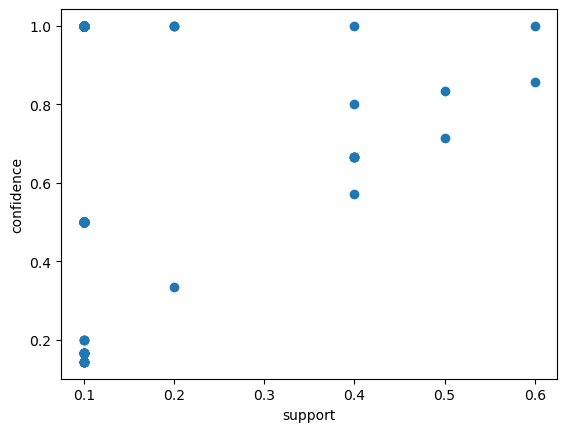

In [23]:
plt.scatter(rules['support'],rules['confidence'])
plt.xlabel('support')
plt.ylabel('confidence')
plt.show()

# lets try with 25% support and 65% confidence

In [24]:
frequent_itemsets1 = apriori(movies1, min_support=0.25, use_colnames=True)
frequent_itemsets1

C:\Users\karth\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


support                           itemsets
0      0.6                      (Sixth Sense)
1      0.7                        (Gladiator)
2      0.6                          (Patriot)
3      0.5           (Sixth Sense, Gladiator)
4      0.4             (Patriot, Sixth Sense)
5      0.6               (Patriot, Gladiator)
6      0.4  (Patriot, Sixth Sense, Gladiator)

In [25]:
rules1 = association_rules(frequent_itemsets1, metric="lift", min_threshold=0.65)
rules1
rules1.sort_values('lift',ascending = False)

antecedents               consequents  antecedent support  \
5                (Gladiator)                 (Patriot)                 0.7   
4                  (Patriot)               (Gladiator)                 0.6   
6     (Sixth Sense, Patriot)               (Gladiator)                 0.4   
11               (Gladiator)    (Sixth Sense, Patriot)                 0.7   
8   (Sixth Sense, Gladiator)                 (Patriot)                 0.5   
9                  (Patriot)  (Sixth Sense, Gladiator)                 0.6   
0              (Sixth Sense)               (Gladiator)                 0.6   
1                (Gladiator)             (Sixth Sense)                 0.7   
2                  (Patriot)             (Sixth Sense)                 0.6   
3              (Sixth Sense)                 (Patriot)                 0.6   
7       (Patriot, Gladiator)             (Sixth Sense)                 0.6   
10             (Sixth Sense)      (Patriot, Gladiator)                 0.6   

    consequent support  support  confidence      lift  leverage  conviction  
5                  0.6      0.6    0.857143  1.428571      0.18         2.8  
4                  0.7      0.6    1.000000  1.428571      0.18         inf  
6                  0.7      0.4    1.000000  1.428571      0.12         inf  
11                 0.4      0.4    0.571429  1.428571      0.12         1.4  
8                  0.6      0.4    0.800000  1.333333      0.10         2.0  
9                  0.5      0.4    0.666667  1.333333      0.10         1.5  
0                  0.7      0.5    0.833333  1.190476      0.08         1.8  
1                  0.6      0.5    0.714286  1.190476      0.08         1.4  
2                  0.6      0.4    0.666667  1.111111      0.04         1.2  
3                  0.6      0.4    0.666667  1.111111      0.04         1.2  
7                  0.6      0.4    0.666667  1.111111      0.04         1.2  
10                 0.6      0.4    0.666667  1.111111      0.04         1.2

When i applied 25% support and 65% confidence, my insights are as follows,

In the first rule, the person who watched gladiator movie also should have watched Patriot.

In the second rule, the person who watched Patriot movie also should have watched gladiator.

both the rules have same lift ratio but second rule has more confidence so consider second one.

the person who watched Patriot movie also should have watched gladiator.

so like this we can consider the top 5 best association rules for positioning,analysing and decision making

In [26]:
rules1[rules1.lift>1]

antecedents               consequents  antecedent support  \
0              (Sixth Sense)               (Gladiator)                 0.6   
1                (Gladiator)             (Sixth Sense)                 0.7   
2                  (Patriot)             (Sixth Sense)                 0.6   
3              (Sixth Sense)                 (Patriot)                 0.6   
4                  (Patriot)               (Gladiator)                 0.6   
5                (Gladiator)                 (Patriot)                 0.7   
6     (Sixth Sense, Patriot)               (Gladiator)                 0.4   
7       (Patriot, Gladiator)             (Sixth Sense)                 0.6   
8   (Sixth Sense, Gladiator)                 (Patriot)                 0.5   
9                  (Patriot)  (Sixth Sense, Gladiator)                 0.6   
10             (Sixth Sense)      (Patriot, Gladiator)                 0.6   
11               (Gladiator)    (Sixth Sense, Patriot)                 0.7   

    consequent support  support  confidence      lift  leverage  conviction  
0                  0.7      0.5    0.833333  1.190476      0.08         1.8  
1                  0.6      0.5    0.714286  1.190476      0.08         1.4  
2                  0.6      0.4    0.666667  1.111111      0.04         1.2  
3                  0.6      0.4    0.666667  1.111111      0.04         1.2  
4                  0.7      0.6    1.000000  1.428571      0.18         inf  
5                  0.6      0.6    0.857143  1.428571      0.18         2.8  
6                  0.7      0.4    1.000000  1.428571      0.12         inf  
7                  0.6      0.4    0.666667  1.111111      0.04         1.2  
8                  0.6      0.4    0.800000  1.333333      0.10         2.0  
9                  0.5      0.4    0.666667  1.333333      0.10         1.5  
10                 0.6      0.4    0.666667  1.111111      0.04         1.2  
11                 0.4      0.4    0.571429  1.428571      0.12         1.4

# Visualization

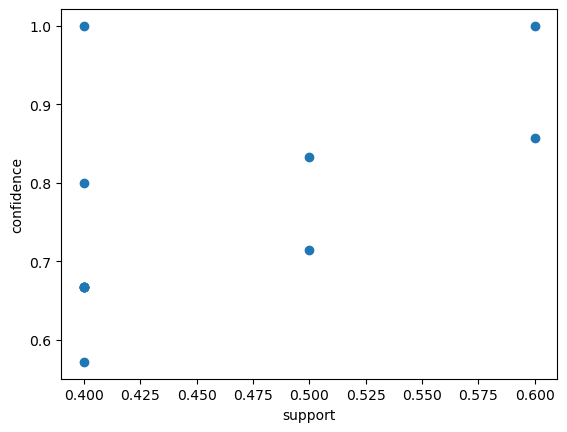

In [27]:
plt.scatter(rules1['support'],rules1['confidence'])
plt.xlabel('support')
plt.ylabel('confidence')
plt.show()